C:\Users\asus\AppData\Local\Temp\ipykernel_29096\3967975504.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


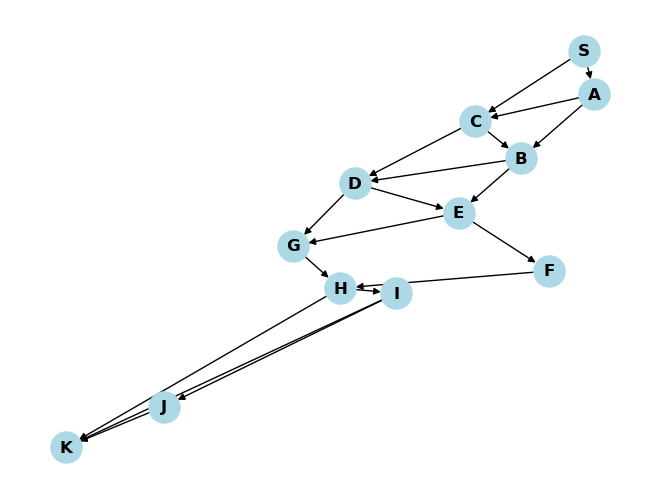

In [1]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import networkx as nx
import matplotlib.pyplot as plt

class KShortestPathsGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("k-Shortest Paths Algorithm Visualizer")

        # Create a directed graph
        self.graph = nx.DiGraph()

        # Add nodes to the graph
        self.graph.add_nodes_from(['S', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])

        # Add edges to the graph
        self.graph.add_edges_from([('S', 'A', {'weight': 4}), ('S', 'C', {'weight': 2}), ('A', 'C', {'weight': 5}),
                                   ('A', 'B', {'weight': 3}), ('C', 'B', {'weight': 7}), ('C', 'D', {'weight': 2}),
                                   ('B', 'D', {'weight': 3}), ('B', 'E', {'weight': 5}), ('D', 'E', {'weight': 4}),
                                   ('D', 'G', {'weight': 2}), ('E', 'G', {'weight': 5}), ('G', 'H', {'weight': 6}),
                                   ('E', 'F', {'weight': 2}), ('F', 'H', {'weight': 3}), ('I', 'J', {'weight': 4}),
                                   ('I', 'K', {'weight': 3}), ('J', 'K', {'weight': 5}), ('H', 'I', {'weight': 7}),
                                   ('H', 'K', {'weight': 2})])

        # Define nodes and k values
        self.nodes = list(self.graph.nodes)
        self.k_values = [1, 2, 3, 4, 5]

        # Input widgets
        tk.Label(self.root, text="Source Node:").grid(row=0, column=0)
        self.source_combo = ttk.Combobox(self.root, values=self.nodes, state="readonly")
        self.source_combo.grid(row=0, column=1)

        tk.Label(self.root, text="Target Node:").grid(row=1, column=0)
        self.target_combo = ttk.Combobox(self.root, values=self.nodes, state="readonly")
        self.target_combo.grid(row=1, column=1)

        tk.Label(self.root, text="k Value:").grid(row=2, column=0)
        self.k_combo = ttk.Combobox(self.root, values=self.k_values, state="readonly")
        self.k_combo.grid(row=2, column=1)

        self.run_button = tk.Button(self.root, text="Run Algorithm", command=self.run_algorithm)
        self.run_button.grid(row=3, column=0, columnspan=2)

        # Canvas for displaying paths
        self.canvas = tk.Canvas(self.root, width=600, height=400, bg='white')
        self.canvas.grid(row=4, column=0, columnspan=2)

    def run_algorithm(self):
        source = self.source_combo.get()
        target = self.target_combo.get()
        k = int(self.k_combo.get())

        # Call k-shortest paths algorithm and get paths
        paths = self.k_shortest_paths(source, target, k)

        # Display graph and paths
        self.display_graph()
        self.display_paths(paths)

    def k_shortest_paths(self, source, target, k):
        # Calculate k shortest paths using NetworkX
        paths = nx.shortest_simple_paths(self.graph, source, target, weight='weight')
        # Get the first k shortest paths
        k_paths = []
        for i in range(k):
            try:
                path = next(paths)
                k_paths.append(path)
            except StopIteration:
                break
        return k_paths

    def display_graph(self):
        # Draw the graph using NetworkX
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show(block=False)  # Show the graph without blocking the Tkinter application

    def display_paths(self, paths):
        self.canvas.delete("all")
        y_offset = 50
        for i, path in enumerate(paths):
            self.canvas.create_text(100, y_offset + i * 30, text=f"Path {i+1}: {' -> '.join(path)}", anchor='w', font=('Arial', 12))

# Create the GUI
root = tk.Tk()
app = KShortestPathsGUI(root)
root.mainloop()
